In [56]:
#importing the libraries
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd  
import seaborn as sns #modern plotting
from sklearn.metrics import r2_score
from sklearn.datasets import load_boston
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import StandardScaler

In [57]:
# reading data from the UCI datasets
data = pd.read_excel("https://github.com/Rathang1/CS-6375_Machine-Learning/raw/main/Real%20estate%20valuation%20data%20set.xlsx")
data.head()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.916667,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.916667,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583333,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500000,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833333,5.0,390.56840,5,24.97937,121.54245,43.1


In [58]:
# dropping the first index column as index is being repeated
data.drop(columns=['No'], inplace = True)

In [59]:
data.shape

(414, 7)

In [60]:
# checking null values
data.isnull().sum()

X1 transaction date                       0
X2 house age                              0
X3 distance to the nearest MRT station    0
X4 number of convenience stores           0
X5 latitude                               0
X6 longitude                              0
Y house price of unit area                0
dtype: int64

#Exploratory Data Analysis

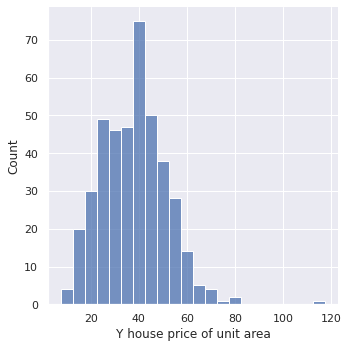

In [61]:
# Checking Target value distribution
sns.displot(data['Y house price of unit area'])

In [62]:
data.describe()

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,2013.148953,17.712560,1083.885689,4.094203,24.969030,121.533361,37.980193
std,0.281995,11.392485,1262.109595,2.945562,0.012410,0.015347,13.606488
min,2012.666667,0.000000,23.382840,0.000000,24.932070,121.473530,7.600000
25%,2012.916667,9.025000,289.324800,1.000000,24.963000,121.528085,27.700000
50%,2013.166667,16.100000,492.231300,4.000000,24.971100,121.538630,38.450000
75%,2013.416667,28.150000,1454.279000,6.000000,24.977455,121.543305,46.600000
max,2013.583333,43.800000,6488.021000,10.000000,25.014590,121.566270,117.500000


In [63]:
# Standardizing the data
data.iloc[:,0:-1] = data.iloc[:,0:-1].apply(lambda x: (x-x.mean())/ x.std(), axis=0)
data.head()

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,-0.823725,1.254111,-0.791537,2.004982,1.124070,0.448220,37.9
1,-0.823725,0.156896,-0.615866,1.665488,0.911342,0.400654,42.2
2,1.540380,-0.387322,-0.413515,0.307513,1.485063,0.687352,47.3
3,1.244867,-0.387322,-0.413515,0.307513,1.485063,0.687352,54.8
4,-1.119238,-1.115873,-0.549332,0.307513,0.833180,0.592220,43.1


X1 transaction date                          AxesSubplot(0.125,0.536818;0.168478x0.343182)
X2 house age                              AxesSubplot(0.327174,0.536818;0.168478x0.343182)
X3 distance to the nearest MRT station    AxesSubplot(0.529348,0.536818;0.168478x0.343182)
X4 number of convenience stores           AxesSubplot(0.731522,0.536818;0.168478x0.343182)
X5 latitude                                     AxesSubplot(0.125,0.125;0.168478x0.343182)
X6 longitude                                 AxesSubplot(0.327174,0.125;0.168478x0.343182)
Y house price of unit area                   AxesSubplot(0.529348,0.125;0.168478x0.343182)
dtype: object

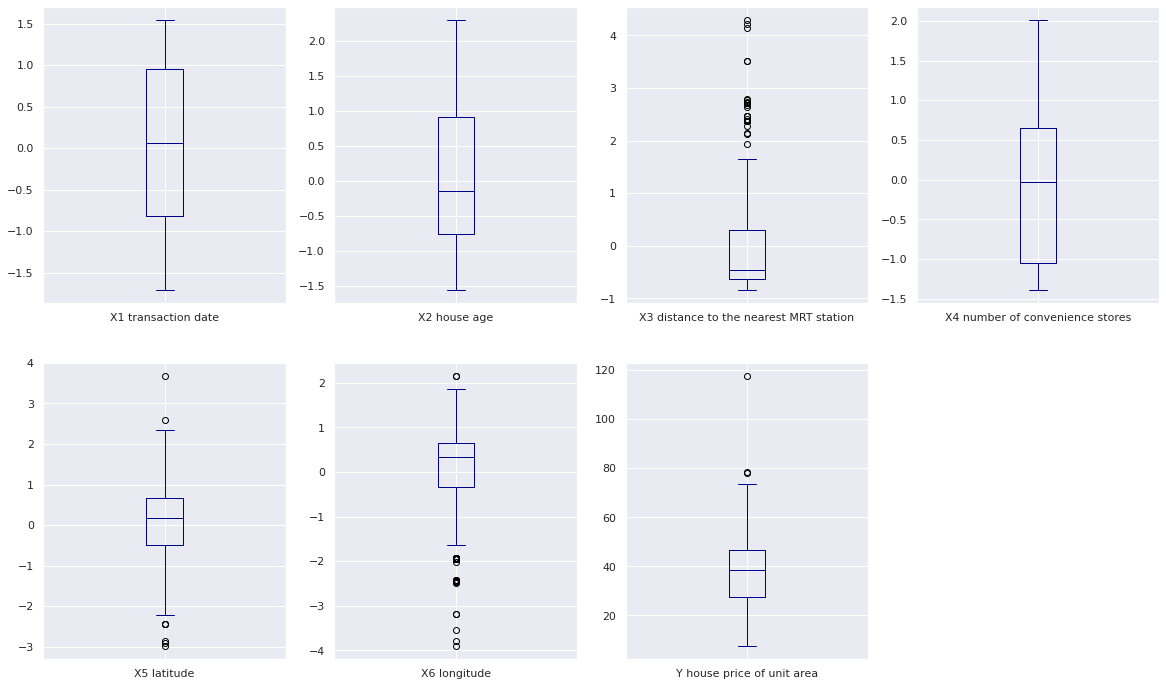

In [64]:
# Box plot for feature selection
data.plot.box(color='DarkBlue', figsize=(20,12), subplots=True, layout=(2,4))

In [65]:
# Correlation matrix
correlation_matrix = data.corr().round(2)
correlation_matrix

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
X1 transaction date,1.00,0.02,0.06,0.01,0.04,-0.04,0.09
X2 house age,0.02,1.00,0.03,0.05,0.05,-0.05,-0.21
X3 distance to the nearest MRT station,0.06,0.03,1.00,-0.60,-0.59,-0.81,-0.67
X4 number of convenience stores,0.01,0.05,-0.60,1.00,0.44,0.45,0.57
X5 latitude,0.04,0.05,-0.59,0.44,1.00,0.41,0.55
X6 longitude,-0.04,-0.05,-0.81,0.45,0.41,1.00,0.52
Y house price of unit area,0.09,-0.21,-0.67,0.57,0.55,0.52,1.00


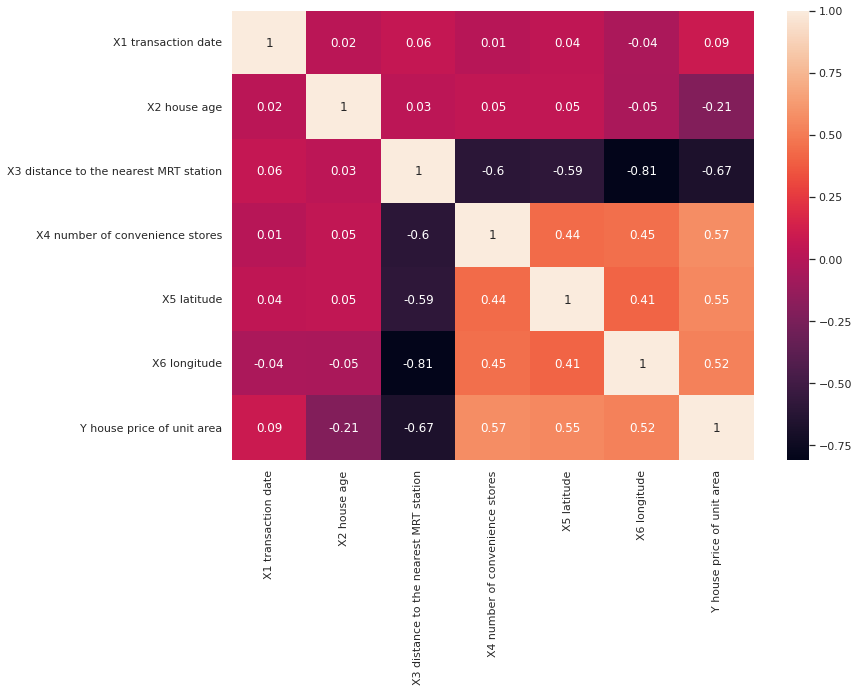

In [66]:
# Heatmap for feature selection
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.heatmap(data=correlation_matrix, annot=True)

In [67]:
print(abs(data.corr())['Y house price of unit area'].sort_values(ascending=False))

Y house price of unit area                1.000000
X3 distance to the nearest MRT station    0.673613
X4 number of convenience stores           0.571005
X5 latitude                               0.546307
X6 longitude                              0.523287
X2 house age                              0.210567
X1 transaction date                       0.087529
Name: Y house price of unit area, dtype: float64


In [68]:
def plotScatterMatrix(df, plotSize):
    df = df.select_dtypes(include =[np.number])
    df = df.dropna('columns')
    df = df[[col for col in df if df[col].nunique() > 1]] 
    columnNames = list(df)
    if len(columnNames) > 10:
        columnNames = columnNames[:10]
    df = df[columnNames]
    ax = pd.plotting.scatter_matrix(df, alpha=0.75, figsize=[plotSize, plotSize], diagonal='kde')
    corrs = df.corr().values
    plt.suptitle('Scatter and Density Plot')
    plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.dropna will be keyword-only
  This is separate from the ipykernel package so we can avoid doing imports until


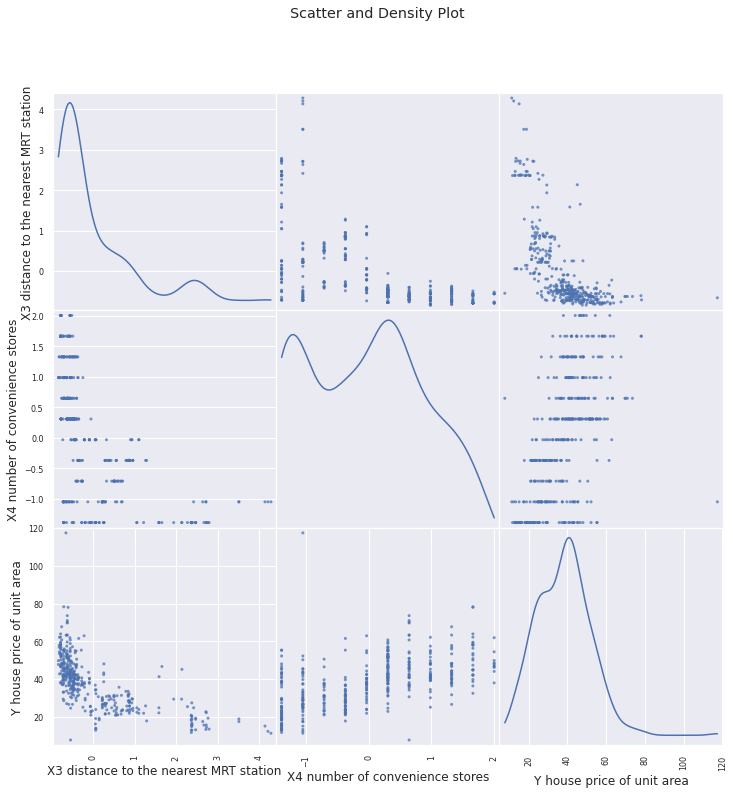

In [69]:
plotScatterMatrix(data[["X3 distance to the nearest MRT station", "X4 number of convenience stores", "Y house price of unit area"]],12)

In [70]:
#Selecting features that are most relevant to create or model
X = data[["X3 distance to the nearest MRT station", "X4 number of convenience stores"]] 
Y = data['Y house price of unit area']

In [71]:
print(X.shape)
print(Y.shape)

(414, 2)
(414,)


In [72]:
# Splitting the dataset
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=6)

In [73]:
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(331, 2)
(331,)
(83, 2)
(83,)


In [91]:
# Applying SGD Regressor to the processed dataset
sgdr = SGDRegressor(alpha=0.1,max_iter=200)
sgdr.fit(X_train, Y_train)


ypred = sgdr.predict(X_test)

rmse = (np.sqrt(mean_squared_error(Y_test, ypred)))
r2 = r2_score(Y_test, ypred)
mae = mean_absolute_error(Y_test, ypred)
print("R-squared:", r2)
print("Mean Absolute Error: ", mae)
print("RMSE: ", rmse)
print(r2,mae, rmse)


R-squared: 0.4527432211529516
Mean Absolute Error:  7.32402588336767
RMSE:  10.154253463158735
0.4527432211529516 7.32402588336767 10.154253463158735


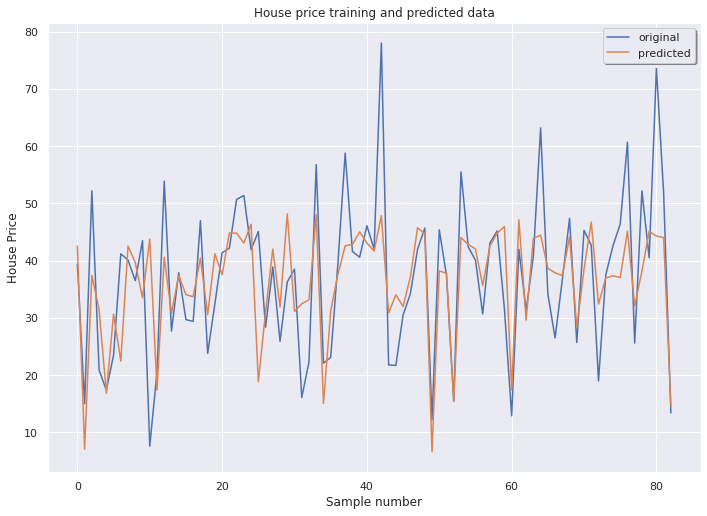

In [92]:
# Plotting  
x_ax = range(len(Y_test))
plt.plot(x_ax, Y_test, label="original")
plt.plot(x_ax, ypred, label="predicted")
plt.title("House price training and predicted data")
plt.xlabel('Sample number')
plt.ylabel('House Price')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
plt.show()